Generated data points:
[[-0.16520398  1.8131027 ]
 [-1.10427158  4.09972969]
 [ 5.36825235  4.30946932]
 [ 5.31499736  4.49976369]
 [ 0.2127104   3.98850906]
 [-1.5228236   3.48503374]
 [ 3.31794695  2.39369345]
 [ 5.4559266   3.42490395]
 [ 1.08565898  3.12315918]
 [ 3.44870454  3.26260948]
 [ 2.42464832  3.01280039]
 [ 2.01608308  1.14124139]
 [ 0.62598024  1.83853764]
 [ 1.44459371  1.96195545]
 [ 2.64072831  2.51170438]
 [ 2.59814244  3.93699262]
 [ 4.07139181  1.63658845]
 [ 3.53633653  1.96134516]
 [ 3.58115761  1.97412576]
 [ 0.29147114  4.37400296]
 [ 5.87892806  3.93662778]
 [ 1.90904691  1.49908452]
 [ 3.03091778  3.03908307]
 [ 1.61911289  4.15510066]
 [ 4.44009652  2.02197634]
 [-0.94293296  0.40658332]
 [ 3.39867501  2.75621897]
 [ 2.39889306  2.38357249]
 [ 1.68199029  1.41789977]
 [ 6.29817909  3.04468284]]
[[ 2.06722602  2.27005539]
 [ 1.70658533  1.33058778]
 [ 1.78357485  0.12490507]
 [ 1.81067525 -0.11828914]
 [ 1.80070435  3.81308483]
 [ 3.3357439   1.63829726]
 [ 3

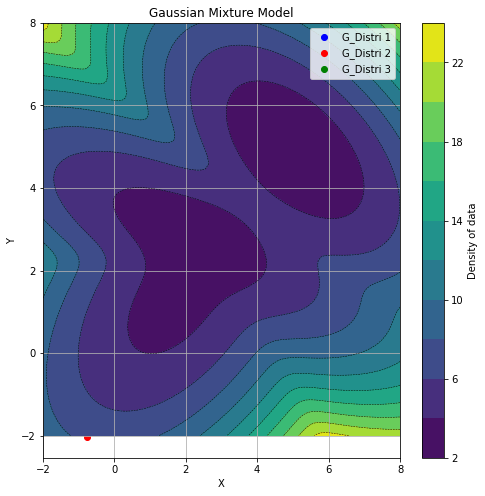

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# New mean vectors
mean1 = np.array([3, 3])  # Updated mean vector for Distribution 1
mean2 = np.array([2, 2])  # Updated mean vector for Distribution 2
mean3 = np.array([5, 5])  # Updated mean vector for Distribution 3

Sigma1 = np.array([[4, 0.5], [0.5, 1]])  # Covariance matrix for Distribution 1
Sigma2 = np.array([[1, 0.5], [0.5, 2]])  # Covariance matrix for Distribution 2
Sigma3 = np.array([[2, -1], [-1, 1]])    # Covariance matrix for Distribution 3

# Random data generator
np.random.seed()
data1 = np.random.multivariate_normal(mean1, Sigma1, 30)  # Random data points for Distribution 1
data2 = np.random.multivariate_normal(mean2, Sigma2, 25)  # Random data points for Distribution 2
data3 = np.random.multivariate_normal(mean3, Sigma3, 40)  # Random data points for Distribution 3

print("Generated data points:")
print(data1)
print(data2)
print(data3)

# Combining data1, data2, data3 into ground truth dataset
ground_truth_dataset = np.vstack((data1, data2, data3))

# Gaussian mixture model fitting
gmm = GaussianMixture(n_components=3, random_state=42)  # Update to 3 components
gmm.fit(ground_truth_dataset)

# Generate data points from Gaussian mixture model
x = np.linspace(-2, 8, 100)
y = np.linspace(-2, 8, 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

# Plot the ground truth dataset
plt.figure(figsize=(8, 8))
plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='G_Distri 1')
plt.scatter(data2[:, 0], data2[:, 1], color='red', label='G_Distri 2')
plt.scatter(data3[:, 0], data3[:, 1], color='green', label='G_Distri 3')

# Plot the GMM contours
plt.contour(X, Y, Z, levels=10, linewidths=0.5, colors='k', linestyles='dashed')
plt.contourf(X, Y, Z, levels=10, cmap='viridis')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.grid(True)
plt.colorbar(label='Density of data')
plt.show()


Generated data points:
[[ 2.66711118  4.72955617]
 [ 5.96865774  4.39159672]
 [ 5.53976963  2.45795536]
 [ 2.65551603  3.36783832]
 [ 1.17163915  2.12236111]
 [ 2.06111165  2.0040831 ]
 [ 1.30055292  3.26521622]
 [ 0.75736504  1.96970272]
 [ 1.50964573  3.43673414]
 [ 4.19772708  2.6658648 ]
 [ 3.27093856  3.6117066 ]
 [ 2.06801318  0.38756447]
 [ 0.15163409  1.72868828]
 [ 3.92981544  1.67065347]
 [ 5.74794264  2.19448355]
 [ 3.01726151  1.94178825]
 [ 4.71700127  2.36392685]
 [ 4.55174334  3.68562892]
 [ 1.29728616  2.8480229 ]
 [ 5.58060487  3.11823486]
 [ 2.76425337  3.40726456]
 [ 3.00539471  1.92129965]
 [ 0.52928509  3.54814871]
 [ 3.19085089  2.33525754]
 [ 4.32338032  2.82415901]
 [ 3.46236301  1.89062461]
 [-0.30066589  1.5278212 ]
 [ 2.08028359  2.6801432 ]
 [ 1.86573563  3.64619752]
 [ 4.18778867  2.46297169]]
[[ 1.69269404  0.80444211]
 [ 3.42019131  2.34273566]
 [ 2.35988037  5.84347665]
 [ 2.4977128   1.16987379]
 [ 0.02351256  1.15120149]
 [ 0.89567396  1.61289041]
 [ 1

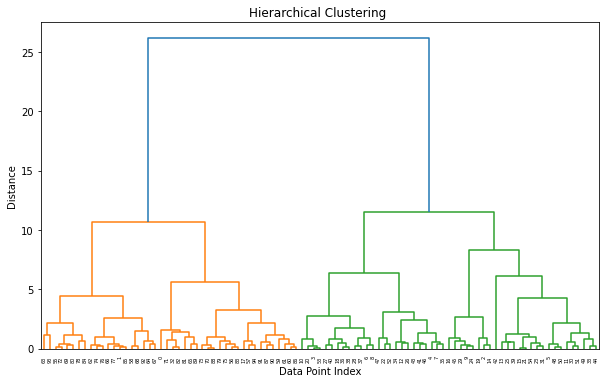

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# New mean vectors
mean1 = np.array([3, 3])  # Updated mean vector for Distribution 1
mean2 = np.array([2, 2])  # Updated mean vector for Distribution 2
mean3 = np.array([5, 5])  # Updated mean vector for Distribution 3

Sigma1 = np.array([[4, 0.5], [0.5, 1]])  # Covariance matrix for Distribution 1
Sigma2 = np.array([[1, 0.5], [0.5, 2]])  # Covariance matrix for Distribution 2
Sigma3 = np.array([[2, -1], [-1, 1]])    # Covariance matrix for Distribution 3

# Random data generator
np.random.seed()
data1 = np.random.multivariate_normal(mean1, Sigma1, 30)  # Random data points for Distribution 1
data2 = np.random.multivariate_normal(mean2, Sigma2, 25)  # Random data points for Distribution 2
data3 = np.random.multivariate_normal(mean3, Sigma3, 40)  # Random data points for Distribution 3

print("Generated data points:")
print(data1)
print(data2)
print(data3)

# Combining data1, data2, data3 into ground truth dataset
ground_truth_dataset = np.vstack((data1, data2, data3))

# Perform hierarchical clustering
Z = linkage(ground_truth_dataset, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering ')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()


Dataset 1:


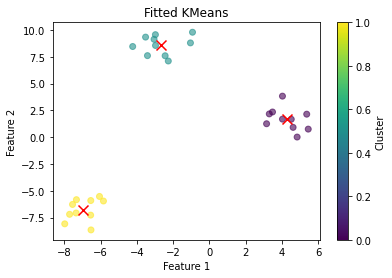

Dataset 2:


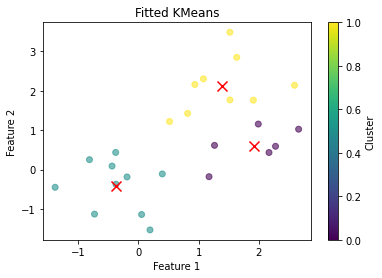

Dataset 3:


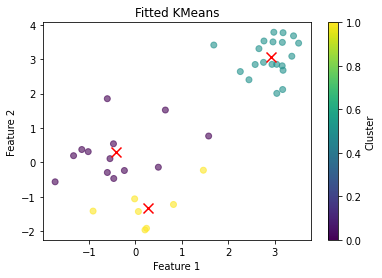

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs  # Import make_blobs function
from sklearn.cluster import KMeans

# Function to generate synthetic datasets
def generate_datasets():
    datasets = []
    # Dataset 1: Well-Separated Clusters
    X1, _ = make_blobs(n_samples=30, centers=3, cluster_std=1.0, random_state=42)
    datasets.append(X1)
    # Dataset 2: Overlapping Clusters
    X2, _ = make_blobs(n_samples=25, centers=[[0, 0], [2, 2]], cluster_std=0.8, random_state=42)
    datasets.append(X2)
    # Dataset 3: Unequal Variance Clusters
    X3, _ = make_blobs(n_samples=40, centers=[[0, 0], [3, 3]], cluster_std=[1.0, 0.5], random_state=42)
    datasets.append(X3)
    return datasets

# Function to fit KMeans and plot results
def fit_and_plot_kmeans(dataset):
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(dataset)
    plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, color='red')
    plt.title('Fitted KMeans')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Main function
def main():
    datasets = generate_datasets()
    for i, dataset in enumerate(datasets):
        print(f"Dataset {i+1}:")
        fit_and_plot_kmeans(dataset)

if __name__ == "__main__":
    main()


Generated data points:
[[ 6.21184632  3.05482378]
 [ 3.09052123  2.92381441]
 [ 0.8956999   3.30453855]
 [-2.1499509   3.39473803]
 [ 3.41115462  2.80130449]
 [ 0.73140732  2.00585225]
 [ 4.60928113  2.40615972]
 [ 3.5377947   1.49576667]
 [ 5.24520825  1.65467987]
 [-0.41313476  0.13681944]
 [ 0.04685464  3.26739344]
 [ 6.85792588  2.85488919]
 [ 3.38396388  3.90087736]
 [ 3.61512338  5.44406949]
 [ 3.90963095  3.29490778]
 [ 4.73966028  3.48035302]
 [ 5.5945755   1.69478069]
 [ 2.99727671  4.31282378]
 [ 2.21443147  2.86780297]
 [ 1.81995209  2.52589215]
 [ 4.59034971  2.48678531]
 [ 2.719667    3.70126506]
 [ 0.53061434  3.11555117]
 [ 5.9599335   1.91306922]
 [ 0.10649649  1.91200985]
 [ 5.30310591  2.57634402]
 [ 3.61564195  1.27425733]
 [ 1.26280166  3.73069551]
 [ 3.7220227   2.7597142 ]
 [ 3.52556747  3.71250196]]
[[-0.38319767  0.01294345]
 [ 1.82655979  1.90075151]
 [ 2.88066029  1.75863952]
 [ 0.40184996  3.86751829]
 [ 1.61244865  1.15341948]
 [ 0.83140289  2.04362384]
 [ 2

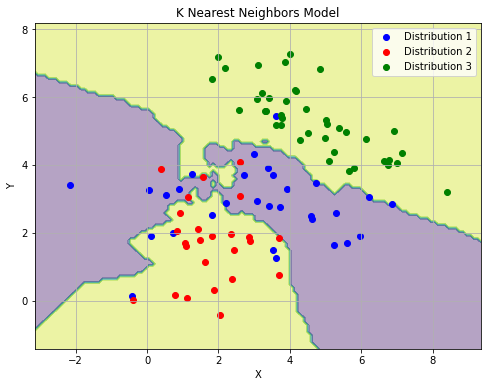

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# New mean vectors
mean1 = np.array([3, 3])  # Updated mean vector for Distribution 1
mean2 = np.array([2, 2])  # Updated mean vector for Distribution 2
mean3 = np.array([5, 5])  # Updated mean vector for Distribution 3

Sigma1 = np.array([[4, 0.5], [0.5, 1]])  # Covariance matrix for Distribution 1
Sigma2 = np.array([[1, 0.5], [0.5, 2]])  # Covariance matrix for Distribution 2
Sigma3 = np.array([[2, -1], [-1, 1]])    # Covariance matrix for Distribution 3

# Random data generator
np.random.seed()
data1 = np.random.multivariate_normal(mean1, Sigma1, 30)  # Random data points for Distribution 1
data2 = np.random.multivariate_normal(mean2, Sigma2, 25)  # Random data points for Distribution 2
data3 = np.random.multivariate_normal(mean3, Sigma3, 40)  # Random data points for Distribution 3

print("Generated data points:")
print(data1)
print(data2)
print(data3)

# Combining data1, data2, data3 into ground truth dataset
ground_truth_dataset = np.vstack((data1, data2, data3))

# Labels for the dataset
labels = np.concatenate((np.zeros(len(data1)), np.ones(len(data2) + len(data3))))

# Fit K Nearest Neighbors model
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(ground_truth_dataset, labels)

# Plot the decision boundaries
x_min, x_max = ground_truth_dataset[:, 0].min() - 1, ground_truth_dataset[:, 0].max() + 1
y_min, y_max = ground_truth_dataset[:, 1].min() - 1, ground_truth_dataset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Distribution 1')
plt.scatter(data2[:, 0], data2[:, 1], color='red', label='Distribution 2')
plt.scatter(data3[:, 0], data3[:, 1], color='green', label='Distribution 3')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K Nearest Neighbors Model')
plt.legend()
plt.grid(True)
plt.show()